## ___Variable Transformation___

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

### ___When should we use Variable Transformation?___
Below are the situations where variable transformation is a requisite:

* When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution. **(Learnt in Feature Scaling)**

* When we can **transform complex non-linear relationships into linear relationships**. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations. (https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/transformations-for-linearity/v/transforming-nonlinear-data)

* **Symmetric distribution is preferred over skewed distribution** as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. **For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.**

### ___Types of Transformations___

* _Logarithm transformation - log(x)_ (Not for 0)
* _Reciprocal transformation - 1 / x_ (Not for 0)
* _Square root transformation - sqrt(x)_
* _Exponential transformation - exp(x)_
* _Yeo-Johnson transformation_ (+ and - ve Numbers)
* _Box-Cox transformation_ (Only +ve Numbers)

### ___Normality Assumption___
A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution.

If methods are used that assume a Gaussian distribution, and your data was drawn from a different distribution, the findings may be misleading or plain wrong.

There are a number of techniques that you can check if your data sample is Gaussian or sufficiently Gaussian-like to use the standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods.

This is a key decision point when it comes to choosing statistical methods for your data sample.

Two classes of techniques for checking whether a sample of data is Gaussian:

* **Graphical Methods** - These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.
* **Statistical Tests** -  These are methods that calculate statistics on the data and quantify how likely it is that the data was drawn from a Gaussian distribution.

Methods of this type are often called normality tests.

#### ___Visual Normality Checks___

* **Histogram Plot**

A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram.

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count in each bin on the y-axis.

A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

* **Quantile-Quantile Plot**

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

#### ___Statistical Normality Tests___

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.

Each test makes different assumptions and considers different aspects of the data.

Each test will return at least two things:

**Statistic**: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

**p-value**: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

 - p <= alpha: reject H0, not normal.
 - p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

* ___Shapiro-Wilk Test___

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution.

* ___D’Agostino’s K^2 Test___ (Normal Test)

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

In [1]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


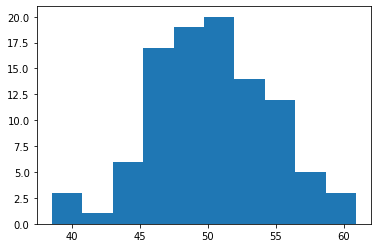

In [2]:
# Visual Normality Checks
# histogram plot
import matplotlib.pyplot as plt

# histogram plot
plt.hist(data)
plt.show()

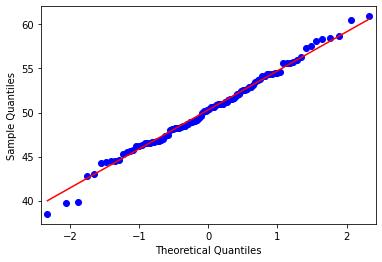

In [3]:
# QQ Plot
import statsmodels.api as sm 
#from statsmodels.graphics.gofplots import qqplot

# q-q plot
sm.qqplot(data, line='s')
plt.show()

In [4]:
### Statistical Normality Tests
# Shapiro-Wilk Test
from scipy.stats import shapiro
 
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [5]:
# D’Agostino’s K^2 Test
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


#### ___TRANSFORMATIONS___

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [7]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"piyushsingla","key":"94939b9ecb5fcbd1eb64911f57ee6087"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [10]:
!kaggle config set -n path -v{/content}

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic -p /content

- path is now set to: {/content}
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
# let's load the titanic dataset

data = pd.read_csv('/content/train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [0]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [0]:
# fill na
data['Age'] = impute_na(data, 'Age')

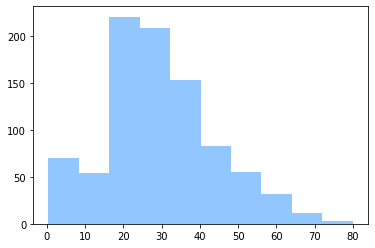

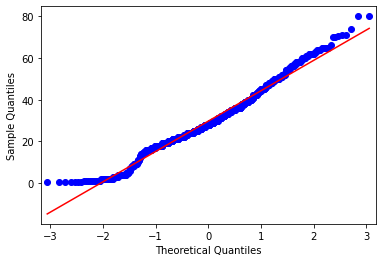

In [14]:
plt.hist(data['Age'])
plt.show()

sm.qqplot(data['Age'], line='s');

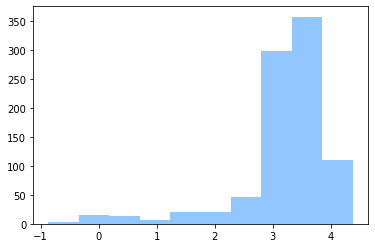

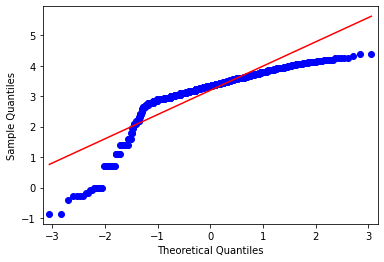

In [15]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

plt.hist(data['Age_log'])
plt.show()

sm.qqplot(data['Age_log'], line='s');

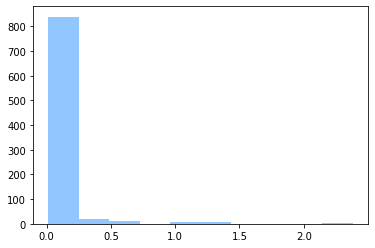

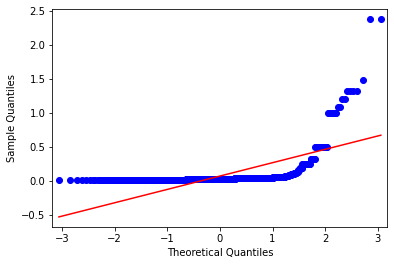

In [16]:
 ### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

plt.hist(data['Age_reciprocal'])
plt.show()

sm.qqplot(data['Age_reciprocal'], line='s');

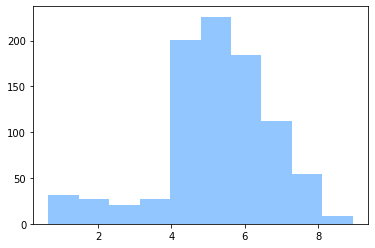

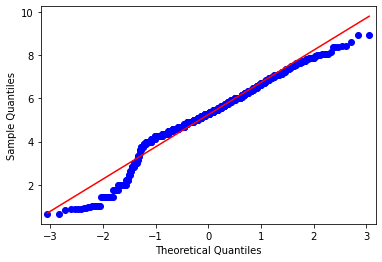

In [17]:
# Square Root Transformation
data['Age_sqr'] = np.sqrt(data.Age)

plt.hist(data['Age_sqr'])
plt.show()

sm.qqplot(data['Age_sqr'], line='s');

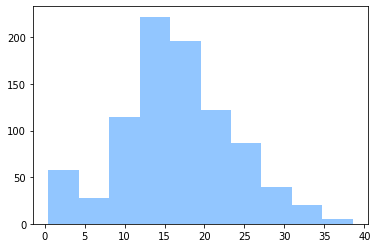

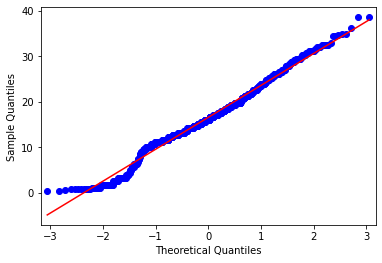

In [18]:
# Exponential Transformation
data['Age_exp'] = data.Age**(1/1.2) 

plt.hist(data['Age_exp'])
plt.show()

sm.qqplot(data['Age_exp'], line='s');

#### ___BoxCox Transformation___

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. 

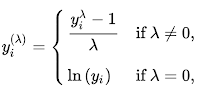

This test only works for positive data. 

Can be used to remove Heteroskedasticity in Linear Regression problems. (Heteroskedasticity usually results from either one or more of the predictors not being normally distributed, or the target variable itself not being normally distributed.)


<table>
<tbody>
<tr>
<td><strong>Lambda value (&lambda;)</strong></td>
<td><strong>Transformed data (Y&rsquo;)</strong></td>
<td><strong>Transformation</strong></td>
</tr>
<tr>
<td>-3</td>
<td>Y<sup>-3</sup>&nbsp;= 1/Y<sup>3</sup></td>
<td>Inverse Cube</td>
</tr>
<tr>
<td>-2</td>
<td>Y<sup>-2</sup>&nbsp;= 1/Y<sup>2</sup></td>
<td>Inverse Squared</td>
  </tr>
<tr>
<td>-1</td>
<td>Y<sup>-1</sup>&nbsp;= 1/Y<sup>1</sup></td>
  <td>Inverse/Reciprocal</td>
</tr>
<tr>
<td>-0.5</td>
<td>Y<sup>-0.5</sup>&nbsp;= 1/(&radic;(Y))</td>
  <td>Inverse Square Root</td>
</tr>
<tr>
<td>0</td>
<td>log(Y)**</td>
  <td>Logrithmic</td>
</tr>
<tr>
<td>0.5</td>
<td>Y<sup>0.5</sup>&nbsp;= &radic;(Y)</td>
  <td>Square Root</td>
</tr>
<tr>
<td>1</td>
<td>Y<sup>1&nbsp;</sup>= Y</td>
  <td>No Change</td>
</tr>
<tr>
<td>2</td>
<td>Y<sup>2</sup></td>
  <td>Squared</td>
</tr>
<tr>
<td>3</td>
<td>Y<sup>3</sup></td>
  <td>Cube</td>
</tr>
</tbody>
</table>

In [27]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    15.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

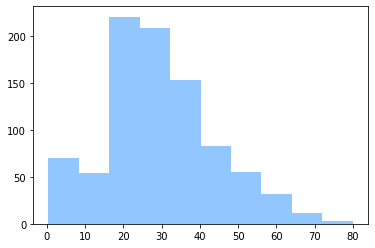

In [20]:
from scipy.stats import boxcox

plt.hist(data['Age'])
plt.show()

In [0]:
data['Age_boxcox'], fitted_lambda = boxcox(data['Age'],lmbda = None)

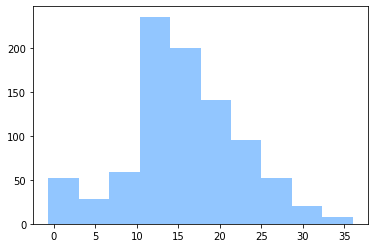

In [24]:
plt.hist(data['Age_boxcox'])
plt.show()

In [25]:
fitted_lambda

0.7648522500282625

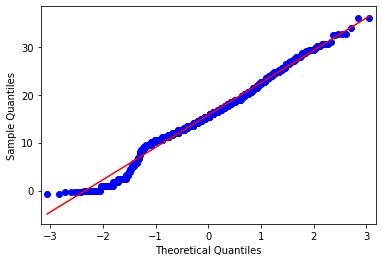

In [29]:
sm.qqplot(data['Age_boxcox'],line = 's');

In [30]:
stat, p = normaltest(data['Age_boxcox'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.897, p=0.387
Sample looks Gaussian (fail to reject H0)


```
#Function
def invboxcox(y,ld):
   if ld == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(ld*y+1)/ld))
```

In [26]:
# Inverse Box Cox
from scipy.special import inv_boxcox

inv_boxcox(data['Age_boxcox'],fitted_lambda)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    15.0
889    26.0
890    32.0
Name: Age_boxcox, Length: 891, dtype: float64

#### ___Yeo -Johnson Transformation___

The Yeo-Johnson transformation is very similar to the Box-Cox but does not require the input variables to be strictly positive. It works for both Negative and Positive.

https://www.stat.umn.edu/arc/yjpower.pdf

In [0]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data_R = data['Age'].values.reshape(-1,1)
pt.fit(data_R)
transformed_data = pt.transform(data_R)

In [62]:
pd.DataFrame(transformed_data)

,0
0,-0.470975
1,0.603136
2,-0.189150
3,0.411322
4,0.411322
...,...
886,-0.120300
887,-0.690080
888,-0.994998
889,-0.189150


In [61]:
pd.DataFrame(pt.inverse_transform(transformed_data))

,0
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,15.0
889,26.0


In [63]:
stat, p = normaltest(transformed_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.305, p=0.521
Sample looks Gaussian (fail to reject H0)
